# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd
import numpy as np
import os

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/' + 'KaggleV2-May-2016.csv'

appt_df = pd.read_csv(CSV_FILE)
# read data using read_csv function

In [2]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [4]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df

clean_appt_df = appt_df
clean_appt_df.columns = ['p_id', 'appt_id', 'gender', 's_day', 'appt_day', 
                         'age', 'area', 'scholar','hiper','dia','alc','hand','sms','no_show']

#clean_appt_df=clean_appt_df.fillna('missing') #fill null with 'missing'

#cleann_appt_df.dropna() #直接删掉数据中的空值，不用上面替换到missing和下面循环删除的步骤
for i in range(clean_appt_df.index.max()):  
    if any([  
        #'missing' in clean_appt_df.loc[i,:].values, 
        clean_appt_df.loc[i,'age']<0 or clean_appt_df.loc[i,'age']>100,
        ]):    #find entry where age < 0 or > 100
        
        print('delete row %s'%i)  
        clean_appt_df.drop([i],inplace=True)  #delete row

delete row 58014
delete row 63912
delete row 63915
delete row 68127
delete row 76284
delete row 90372
delete row 97666
delete row 99832


In [5]:
clean_appt_df.head()

,p_id,appt_id,gender,s_day,appt_day,age,area,scholar,hiper,dia,alc,hand,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
p_id        110519 non-null float64
appt_id     110519 non-null int64
gender      110519 non-null object
s_day       110519 non-null object
appt_day    110519 non-null object
age         110519 non-null int64
area        110519 non-null object
scholar     110519 non-null int64
hiper       110519 non-null int64
dia         110519 non-null int64
alc         110519 non-null int64
hand        110519 non-null int64
sms         110519 non-null int64
no_show     110519 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 17.6+ MB


In [ ]:
#clean_data_df.hist(bins=50, figsize=(20,15))   #histogram for each variables
#plt.show()

#clean_appt_df.to_csv('clean_appt_df.csv') #save clean_appt_df.csv

## Test set creation

- Create a test set of 100k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [ ]:
# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

print(clean_appt_df["no_show"].value_counts())  #no-show: count No and Yes
clean_appt_df["no_show"].value_counts() / len(clean_appt_df["no_show"])  #pecentage of No Yes

In [7]:
# create train set and test set

from sklearn.model_selection import StratifiedShuffleSplit

create_set = StratifiedShuffleSplit(n_splits=1, test_size=0.181, random_state=1234)
for train_index, test_index in create_set.split(clean_appt_df, clean_appt_df["no_show"]):
    train_set = clean_appt_df.loc[train_index]
    test_set = clean_appt_df.loc[test_index]

print(train_set["no_show"].value_counts())
train_set["no_show"].value_counts() / len(train_set)


No     72207
Yes    18302
Name: no_show, dtype: int64


No     0.797735
Yes    0.202199
Name: no_show, dtype: float64

In [ ]:
print(test_set["no_show"].value_counts())
test_set["no_show"].value_counts() / len(test_set)

In [ ]:
test_set["hand"].value_counts()

In [ ]:
import os

PROCESSED_DATA_DIR = 'processed_data'
if not os.path.isdir(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)
test_set.to_csv(PROCESSED_DATA_DIR +'/'+'test_set.csv')
train_set.to_csv(PROCESSED_DATA_DIR +'/'+'train_set.csv')

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

In [8]:
# Make plots here!

%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sb

appt_data = train_set.copy()
#attributes = ['scholar','hiper','dia','alc','hand','sms']



In [ ]:
#age_hist = sb.boxplot(x="no_show", y="age", data=appt_data)

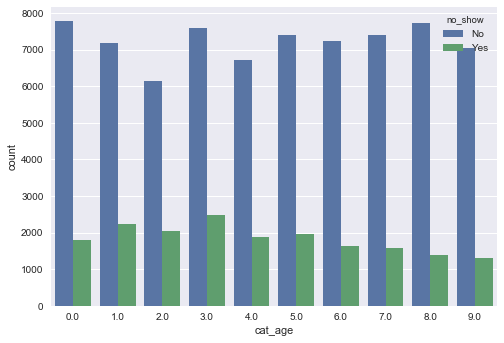

In [9]:
appt_data['cat_age'] = pd.qcut(appt_data['age'], 10, labels=False) # divide age into 10 group
sb.countplot(x='cat_age', hue = 'no_show', data=appt_data)

# age of 10~40 are the most who miss the appointment. after 50, trend to show up. 

In [ ]:
#appt_data.info()

In [ ]:
sb.countplot(x="scholar", hue = "no_show", data=appt_data)

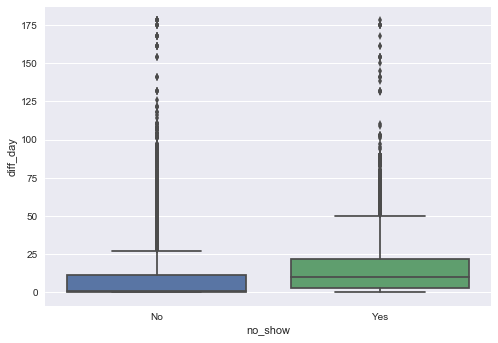

In [17]:
from datetime import datetime

appt_data['format_s_day'] = pd.to_datetime(appt_data['s_day'], format='%Y-%m-%dT%H:%M:%SZ')
appt_data['format_appt_day'] = pd.to_datetime(appt_data['appt_day'], format='%Y-%m-%dT%H:%M:%SZ')
appt_data['diff_day'] =  (appt_data['format_appt_day'] - appt_data['format_s_day']).dt.days
appt_data['diff_day'] = [0 if i < 0 else i for i in appt_data['diff_day']]
sb.boxplot(x="no_show", y="diff_day", data=appt_data)

#format the date, compute the gap between appointment day and scheduled day
#larger the gap is, the trend to missing the appt.

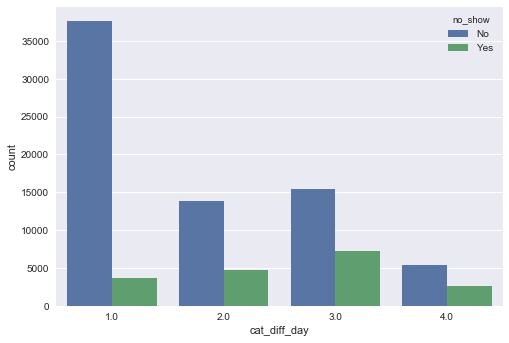

In [25]:
appt_data['cat_diff_day'] = [1 if i < 1 else i for i in appt_data['diff_day']]
appt_data['cat_diff_day'] = [2 if i > 1 and i <= 7 else i for i in appt_data['cat_diff_day']]
appt_data['cat_diff_day'] = [3 if i > 7 and i <= 30 else i for i in appt_data['cat_diff_day']]
appt_data['cat_diff_day'] = [4 if i > 30 else i for i in appt_data['cat_diff_day']]
sb.countplot(x="cat_diff_day", hue = "no_show", data=appt_data)


In [ ]:
def count_noshow(data,col_1,col_2):
    num_noshow = 0
    for index, row in data.iterrows():
        value1 = row[col_1]
        value2 = row[col_2]
        if value2 == 'Yes':
            if value1 == 1:
                num_noshow += 1
    return num_noshow
sch_noshow = count_noshow(data,'scholar','no_show')
alc_noshow = count_noshow(data,'alc','no_show')
hiper_noshow = count_noshow(data,'hiper','no_show')
hand_noshow = count_noshow(data,'hand','no_show')
sms_noshow = count_noshow(data,'sms','no_show')

print(sch_noshow,alc_noshow,hiper_noshow,hand_noshow,sms_noshow)

In [ ]:
    
no_sch,yes_sch = data["scholar"].value_counts()
print('No_Scholar: ',no_sch,'\nYes_Scholar: ',yes_sch)

no_show,yes_show = data["no_show"].value_counts()


data['scholar'].hist()
plt.show()
#print(num_noshow)
#attributes = ['no_show','gender','age', 'area', 'scholar','hiper','dia','alc','hand','sms']
#scatter_matrix(data[attributes], figsize=(12, 8))
#plt.show()

In [ ]:
num_sch = [x for x in data['scholar'] if data['no_show'] = 'Yes']
print(num_sch)

In [ ]:
#clean_appt_df['gender'] = clean_appt_df['gender'].map( {'F': 0, 'M': 1} ).astype(int)

clean_appt_df['no_show'] = clean_appt_df['no_show'].map( {'No': 0, 'Yes': 1} ).astype(int)
# no_show column, turn No and Yes into 0 and 1

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# create pipeline here!

# show the first 5 rows of the transformed training set

In [ ]:
cat_attributes = ['ocean_proximity']
num_attributes = [x for x in list(housing) if x not in cat_attributes]

# This is used to select columns from a pandas DataFrame 
# Needed since sklearn does not have builtin support for pandas
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    
# This transformer adds the normalized attributes we looked at above
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class NormalizedAttributesAdder(BaseEstimator, TransformerMixin):        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', NormalizedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])